In [17]:
from netCDF4 import Dataset
import numpy as np
import datetime
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import cartopy
from scipy.spatial.kdtree import KDTree
import tqdm
from pyproj import Proj, Transformer
import warnings
warnings.filterwarnings("ignore")

In [18]:
def lonlat_to_xy(coords_1, coords_2, hemisphere, inverse=False):

    """Converts between longitude/latitude and EASE xy coordinates.
 
    Args:
        lon (float): WGS84 longitude
        lat (float): WGS84 latitude
        hemisphere (string): 'n' or 's'
        inverse (bool): if true, converts xy to lon/lat
 
    Returns:
        tuple: pair of xy or lon/lat values
    """

    EASE_Proj = {'n': 'EPSG:3408',
                 's': 'EPGS:3409'}
    
    WGS_Proj = 'EPSG:4326'
    
    for coords in [coords_1, coords_2]: assert isinstance(coords,(np.ndarray,list))

    if inverse == False: # lonlat to xy
        
        lon, lat = coords_1, coords_2
        
        transformer = Transformer.from_crs(WGS_Proj, EASE_Proj[hemisphere])
        
        x, y = transformer.transform(lat, lon)
        
        return (x, y)

    else: # xy to lonlat
        
        x, y = coords_1, coords_2
        
        transformer = Transformer.from_crs(EASE_Proj[hemisphere], WGS_Proj)
        
        lat, lon = transformer.transform(x, y)
        
        return (lon, lat)

### load common files

In [19]:
datapath = '/Users/carmennab/Dropbox/alpha_retracker/data/'
ice_type = np.array(Dataset(datapath+'auxiliary/icetype_01012010-30042021.nc')['Ice Type'])

rho_fyi = 916.7  
rho_myi = 882.
rho_w = 1023.9
c = 3.
cs = 2.4

ease_lats = np.asarray(Dataset(datapath+'snow/SMLG_ERA5_01Jan2010-31Jul2021.nc')['Latitude'])
ease_lons = np.asarray(Dataset(datapath+'snow/SMLG_ERA5_01Jan2010-31Jul2021.nc')['Longitude'])

In [20]:
ease_x, ease_y = lonlat_to_xy(ease_lons,ease_lats,hemisphere='n')
tree = KDTree(list(zip(ease_x.ravel(),ease_y.ravel())))

### load buoy days and locations

In [21]:
### ULS_A
a_days = [np.arange(272,575), # 30/09/10 - 30/07/11 
        np.arange(575,954), # 31/07/11 - 12/08/12 
        np.arange(956,1322), # 14/08/12 - 14/08/13
        np.arange(1322,1735), # 15/08/13 - 01/10/14
        np.arange(1735,2105), # 02/10/14 - 06/10/15
        np.arange(2107,2472), # 09/10/15 - 07/10/16
        np.arange(2473,2821), # 09/10/16 - 21/09/17
        np.arange(2824,3190), # 25/09/17 - 25/09/18
        np.arange(3190,len(ice_type))] # 26/09/18 - 28/08/21

buoya_lats = np.array([75.009183333333333334,
        74.9996116666666667,
        75.00011,
        74.9928966666666667,
        75.20733333333333333,
        75.13928333333333333,
        75.0045,
        75.17366666666666666,
        75.00013166666666666667
        ])

buoya_lons = np.array([-149.9790683333333332,
        -149.9775783333333333,
        -150.0057833333333333334,
        -149.98059,
        -149.9562083333333334,
        -149.91972,
        -149.9994316666666668,
        -150.144865,
        -149.9994316666666668
       ])

a_x = [237,237,237,237,237,237,237,237,237]
a_y = [147,147,147,147,147,147,147,147,147]

In [22]:
### ULS_B
b_days = [np.arange(276,578), # 04/10/10 - 02/08/11 
        np.arange(579,967), # 03/08/11 - 25/08/12 
        np.arange(972,1329), # 30/08/12 - 21/08/13
        np.arange(1329,1742), # 22/08/13 - 08/10/14
        np.arange(1743,2099), # 10/10/14 - 30/09/15
        np.arange(2107,2469), # 09/10/15 - 04/10/16
        np.arange(2470,2819), # 06/10/16 - 19/09/17
        np.arange(2820,3187), # 21/09/17 - 22/09/18
        np.arange(3188,len(ice_type))] # 24/09/18 - 25/04/21

buoyb_lats = np.array([77.9885433333333332,
        78.448,
        77.999905,
        77.991935,
        78.11096666666666666,
        77.9998783333333333,
        77.9976916666666666,
        78.1748,
        78.5498333333333333
        ])

buoyb_lons = np.array([-149.96996,
        -149.9773016666666666,
        -149.9987366666666667,
        -150.5396666666666666,
        -149.9974283333333333,
        -149.998791666666666,
        -149.9611583333333334,
        -149.9786983333333334,
        -149.9641433333333332
       ])

b_x = [226,224,226,226,226,226,226,225,224]
b_y = [153,154,153,154,154,153,153,154,155]

In [23]:
### ULS_D
d_days = [np.arange(283,587), # 11/10/10 - 12/08/11 
        np.arange(589,964), # 13/08/11 - 22/08/12 
        np.arange(965,1317), # 23/08/12 - 09/08/13
        np.arange(1317,1731), # 10/08/13 - 27/09/14
        np.arange(1732,2111), # 29/09/14 - 12/10/15
        np.arange(2112,2478), # 14/10/15 - 13/10/16
        np.arange(2479,2825), # 15/10/16 - 25/09/17
        np.arange(2827,3179), # 28/09/17 - 14/09/18
        np.arange(3180,len(ice_type))] # 16/09/18 - 20/08/21

buoyd_lats = np.array([73.9990766666666666,
        73.99415,
        73.99411,
        73.9963333333333334,
        74.30883333333333333,
        73.9998,
        74.000008333333333333334,
        74.0043333333333333335,
        74.32333333333333334
        ])

buoyd_lons = np.array([-139.983395,
        -139.98405,
        -139.9807383333333333,
        -139.9466666666666667,
        -140.6235,
        -140.10768333333333334,
        -139.99985,
        -139.9993333333333334,
        -140.00012166666666666667
       ])

d_x = [234,234,234,234,234,234,234,234,233]
d_y = [135,134,134,134,136,135,135,135,135]

### load sit function

In [24]:
def rf_to_sit(snow,retracker,alpha):
    
    sit = np.full((len(ice_type)),np.nan)
    all_lon = np.full((len(ice_type)),np.nan)
    all_lat = np.full((len(ice_type)),np.nan)
    
    for days,lon,lat,x,y in zip(buoy_days,buoy_lons,buoy_lats,mid_buoy_x,mid_buoy_y):
         
        ### select cs2 grid cells within 100km of buoy
        buoy_x, buoy_y = lonlat_to_xy(np.array(lon),np.array(lat),hemisphere='n')
        
        inds = tree.query_ball_point([buoy_x,buoy_y],r=radius*1000)
        
        cells = np.array([np.unravel_index(ind, (361,361)) for ind in inds])
        
        x_min = np.nanmin([cell[0] for cell in cells])
        x_max = np.nanmax([cell[0] for cell in cells])
        y_min = np.nanmin([cell[1] for cell in cells])
        y_max = np.nanmax([cell[1] for cell in cells])
        
        ### calculate SIT in cells within 100km of buoy
        RF = RFs[days,x_min:x_max+1,y_min:y_max+1]

        ice_type_r = ice_type[days,x_min:x_max+1,y_min:y_max+1]
        ice_type_r[ice_type_r==2] = rho_fyi
        ice_type_r[ice_type_r==3] = rho_myi
        ice_type_r[np.isnan(ice_type_r)&~np.isnan(RF)] = rho_fyi # make ambigious icetype = fyi
        rho_i = ice_type_r # sea ice density

        hs = snod[days,x_min:x_max+1,y_min:y_max+1] # snow depth 
        rho_s = sden[days,x_min:x_max+1,y_min:y_max+1] # snow density
        
        Fi = RF + ((((alpha/100) * (c/cs)) -1)*hs) # ice freeboard 
        SIT = ((Fi*rho_w) + (hs*rho_s)) / (rho_w - rho_i) # sea ice thickness 
        
        for count,day in enumerate(days):
            sit[day] = np.nanmean(SIT[count])
            
        all_lon[days] = ease_lons[x,y]
        all_lat[days] = ease_lats[x,y]
        
    data_vars = {'Sea Ice Thickness':(['t'],sit),
                'Longitude':(['t'],all_lon),
                'Latitude':(['t'],all_lat)}
    ds = xr.Dataset(data_vars = data_vars,
                    coords={'Day':(['t'],np.arange(0,len(ice_type)))},
                    )
    ds.attrs = {'Day': "day since 1 January 2010"}
    filepath = datapath+'sit/'+snow+'_'+retracker+'/'+buoy+'/a'+str(alpha)+'.nc'
    ! rm {filepath}
    ds.to_netcdf(filepath,'w')     

### create SIT for each combination

In [25]:
snow = 'SMLG'
retrackers = ['AWI','CPOM']#,'LARM']
buoys = ['ULS_A','ULS_B','ULS_D']
buoy_dayss = [a_days,b_days,d_days]
buoy_lonss = [buoya_lons,buoyb_lons,buoyd_lons]
buoy_latss = [buoya_lats,buoyb_lats,buoyd_lats]
mid_buoy_xs = [a_x,b_x,d_x]
mid_buoy_ys = [a_y,b_y,d_y]

alphas = np.arange(0,101)

sden = np.array(Dataset(datapath + 'snow/SMLG_ERA5_01Jan2010-31Jul2021.nc')['Snow Density'])[:len(ice_type)]
snod = np.array(Dataset(datapath + 'snow/SMLG_ERA5_01Jan2010-31Jul2021.nc')['Snow Depth'])[:len(ice_type)]

radius = 50 # radius from buoy (in km) of CS2 tracks to include

for alpha in tqdm.tqdm(alphas):
    for buoy,buoy_days,buoy_lons,buoy_lats,mid_buoy_x,mid_buoy_y in zip(buoys,buoy_dayss,buoy_lonss,buoy_latss,
                                                                        mid_buoy_xs,mid_buoy_ys):
        for retracker in retrackers:
            RFs = np.asarray(Dataset(datapath+'radar_freeboard/CS2_'+retracker+'.nc')['Radar Freeboard'])
            rf_to_sit(snow,retracker,alpha)

100%|█████████████████████████████████████████| 101/101 [51:19<00:00, 30.49s/it]


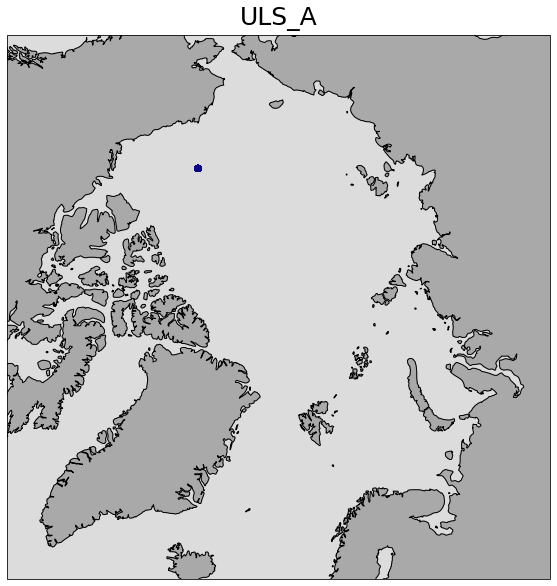

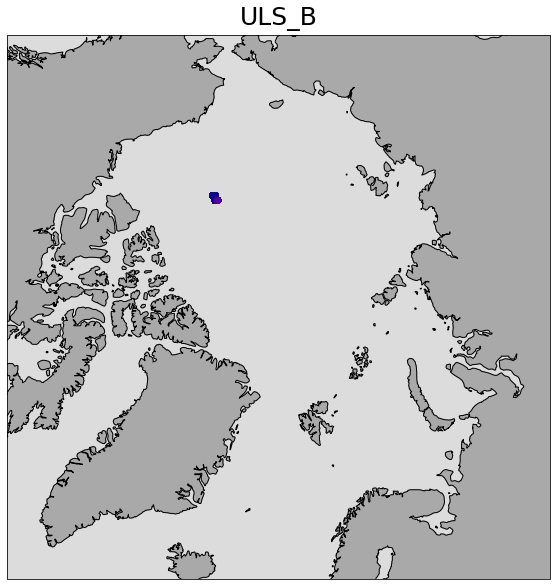

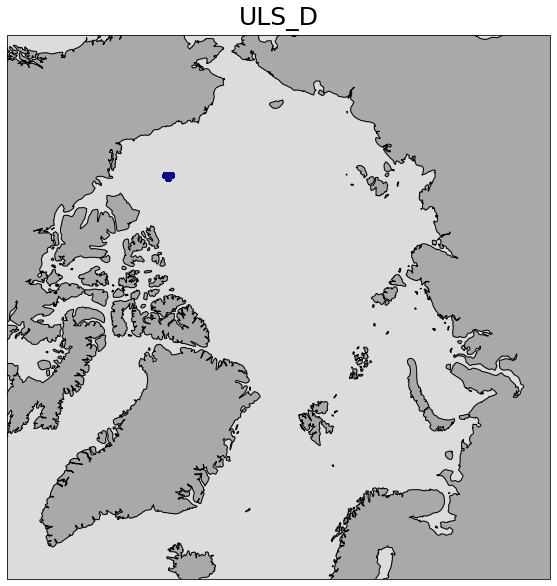

In [26]:
buoys = ['ULS_A','ULS_B','ULS_D']
alphas = np.arange(0,1)
days = np.arange(0,4138)

for counter,buoy in enumerate(buoys):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(projection=ccrs.NorthPolarStereo())
    ax.add_feature(cartopy.feature.LAND, color='darkgrey',zorder=1)
    ax.add_feature(cartopy.feature.OCEAN, color='gainsboro', edgecolor='black')
    ax.set_extent([-180, 180, 90, 65], ccrs.PlateCarree())
    ax.coastlines()  
    for alpha in alphas:
        file = Dataset('/Users/carmennab/Dropbox/alpha_retracker/data/sit/SMLG_AWI/'+buoy+'/a'+str(alpha)+'.nc')
        sit = np.array(file['Sea Ice Thickness'])
        lons = np.array(file['Longitude'])
        lats = np.array(file['Latitude'])
        ax.scatter(lons,lats,c = sit,cmap='plasma',vmin=0,vmax=3,transform=ccrs.PlateCarree())
    ax.set_title(buoy,fontsize=25, pad=10)
    plt.show()